In [1]:
# import libraries

# For analysis and numerical functions
import pandas as pd
import numpy as np

# Visualization, EDA
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

## Reading Data

Reading data stored in .csv format in 'day.csv'

In [2]:
#Read the data in pandas
bike_data = pd.read_csv("day.csv")

In [3]:
# checking data
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Sanity Check

Checking for Null value and Datatype

In [4]:
bike_data.shape

(730, 16)

In [5]:
# Data Information
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Comments -** The given dataset does not contain any null values and the datatypes of the columns are appropriate

In [6]:
# dropping column instant - not required for modelling
bike_data.drop('instant', axis=1, inplace=True)

In [7]:
# dropping column dteday - not required for modelling
bike_data.drop('dteday', axis=1, inplace=True)

In [8]:
# dropping columns casual and registered - not required for modelling
bike_data.drop(['casual', 'registered'], axis=1, inplace=True)

In [9]:
# cheching if column dropped
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
bike_data.shape

(730, 12)

In [11]:
bike_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Converting season, weathersit, mnth and weekday from numerical to categorical.
As per the dataset they should be categorical variable.

In [12]:
# converting season to categorical
bike_data['season'] = bike_data['season'].apply({1:'spring', 2:'summer', 3:'fall', 4:'winter'}.get)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# converting weathersit to categorical
bike_data['weathersit'] = bike_data['weathersit'].apply({1:'weathersit_1', 2:'weathersit_2', 3:'weathersit_3', 4:'weathersit_4'}.get)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,weathersit_2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,weathersit_2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# converting mnth to categorical
bike_data['mnth'] = bike_data['mnth'].apply({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}.get)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,1,1,weathersit_2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,2,1,weathersit_2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,3,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,4,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,5,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# values weekday column contains
bike_data['weekday'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

`0` = Sunday to `6` = Saturday

In [16]:
# converting yr to categorical
bike_data['weekday'] = bike_data['weekday'].apply({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}.get)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,weathersit_2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,weathersit_2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,1600


## Visualising the Data - EDA

The most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable (cnt)


Segregating numerical and categorical columns

In [17]:
# Segregating numerical and categorical columns
numerical_cols = bike_data.select_dtypes(include=[np.number]).columns
categorical_cols = bike_data.select_dtypes(exclude=[np.number]).columns
print(numerical_cols)
print(categorical_cols)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')
Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [18]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Univariate Analysis

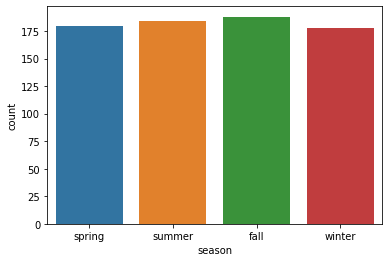

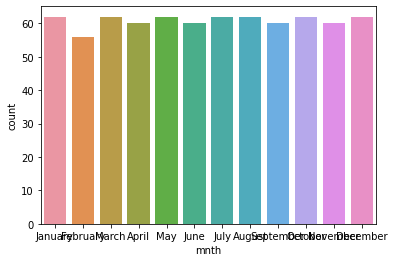

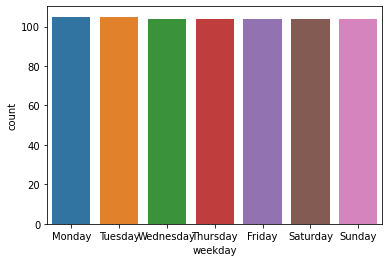

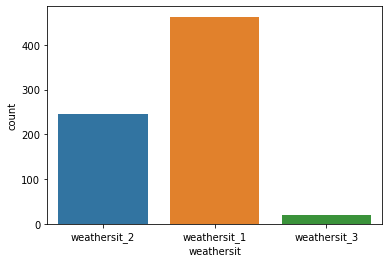

In [19]:
# Analysing categorical variables (count plot)
for i in categorical_cols:
    sns.countplot(bike_data[i])
    plt.show()

**OBSERVATION :**

- count vs season : count of fall is the highest and next is summer.
- count vs mnth : count of all the months seem to be close by but February look to nbe the lowest amoung all.
- count vs weekday : monday and tuesday seem to have a slight high count. Overall there is insignificant difference. 
- count vs weathersit : amoung the three, high count can be observed for weathersit_1(Clear, Few clouds, Partly cloudy, Partly cloudy) whereas lowest count for weathersit_3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds). Also, weathersit_4(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) is not present in the datadabase itself

### Bivariate Analysis 

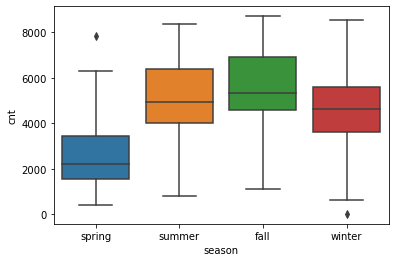

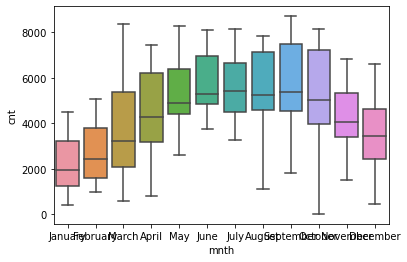

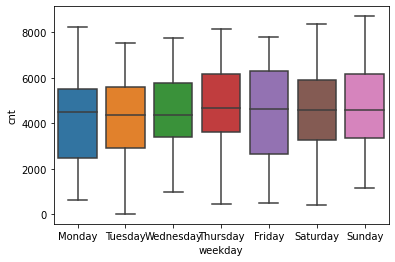

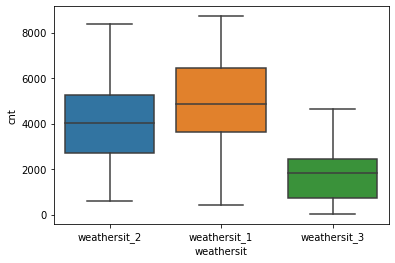

In [20]:
# Analysis of categorical variables with target variable
for i in categorical_cols:
    sns.boxplot(bike_data[i], bike_data['cnt'])
    plt.show()

**OBSERVATION :**

- cnt vs season : for Spring, 50% of the user count is between 2000 to 4000 which is the lowest and has an outlier near 8000 due to which the overall count has increased and the previously plotted histogram shows it similar to the others. Fall has the highest median.
- cnt vs mnth : count increases in first few months starting from January and becomes stable then gradually decreases back towards december 
- cnt vs weekday : all days seem to have median values between 4000 to 5000 
- cnt vs weathersit : among the three, high count can be observed for weathersit_1(Clear, Few clouds, Partly cloudy, Partly cloudy) whereas lowest count for weathersit_3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds). Also, weathersit_4(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) is not present in the dataset itself

#### Pair Plot

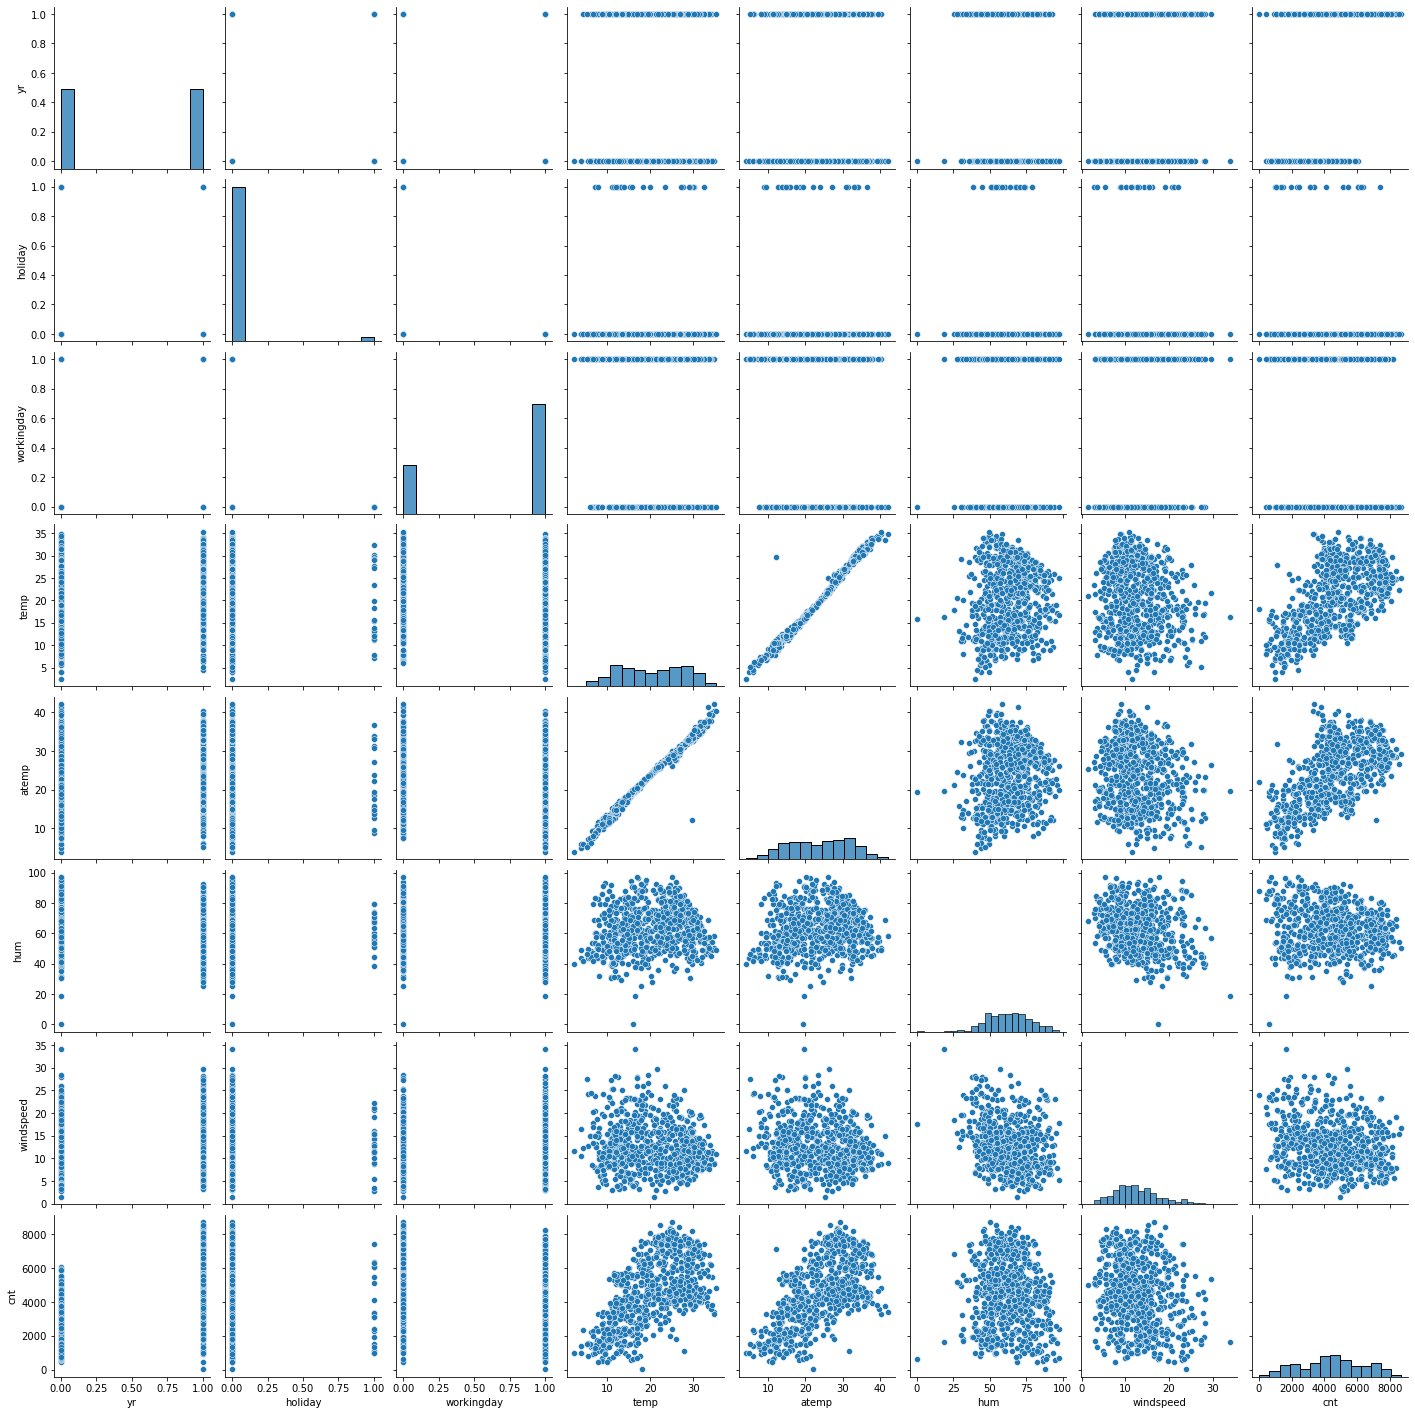

In [21]:
# Plotting pairplot for bike dataset
sns.pairplot(bike_data)
plt.show()


**OBSERVATION :** 

From the above plot (target variable = cnt) -  
- cnt vs temp : can observe +ve linear relationship
- cnt vs atemp : can observe +ve linear relationship
- temp and atemp have hight +ve linear relationship

Therefore atemp be dropped from the dataset

In [22]:
# dropping column atemp
bike_data.drop('atemp', axis=1, inplace=True)

In [23]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,weathersit_2,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,weathersit_2,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,weathersit_1,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,weathersit_1,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,weathersit_1,9.305237,43.6957,12.522300,1600


#### Visualizing variables having 0/1 (no/yes) using box plot

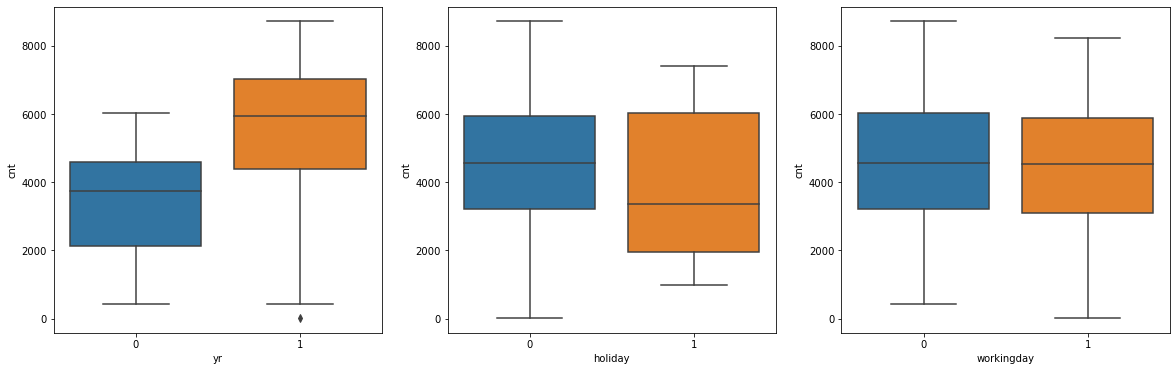

In [24]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(1,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(1,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.show()


**OBSERVATION :** 

From the above plot (target variable = cnt) - 
- cnt vs yr : The demand has increased from year 2018 to 2019 
- cnt vs holiday : The demand is less on a holiday ( reason could be - people either prefer staying home with family or prefer others means of transport for travel on a holiday)
- cnt vs workingday : insignificant difference when it is a workingday or not a workingday

#### Heat Map
Shows a quantitative relation between the variables

<AxesSubplot:>

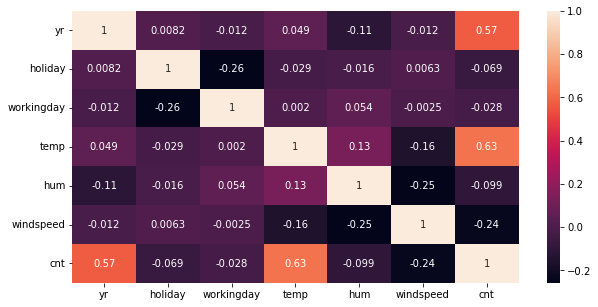

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(bike_data.corr(),annot=True)

## Pre-processing/Data Preparation

In [26]:
target = bike_data['cnt']

- Creating dummy variables for season, weathersit, mnth and weekday
- Concatinating the dummy variables to dataset 
- Removing season and weathersit from dataset
- Train-Test split

### Dummy variable creation

In [27]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_cols'
season_cols = pd.get_dummies(bike_data['season'], drop_first = True)

In [28]:
season_cols.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [29]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_cols'
weathersit_cols = pd.get_dummies(bike_data['weathersit'], drop_first = True)

In [30]:
weathersit_cols.head()

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


**Note:** `weathersit_4` is not used as an entry in the dataset. So, we can consider assuming that we have only three categories - `weathersit_1`,`weathersit_2` and `weathersit_3`. Therefore, after creating the dummny variable we can say that if - 

- `00` corresponds to `weathersit_1`
- `10` corresponds to `weathersit_2`
- `01` corresponds to `weathersit_3`

In [31]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month_cols'
month_cols = pd.get_dummies(bike_data['mnth'], drop_first = True)

In [32]:
month_cols.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [33]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_cols'
weekday_cols = pd.get_dummies(bike_data['weekday'], drop_first = True)

In [34]:
weekday_cols.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


### Concatenation of dummy variable to dataset

In [35]:
# Add season_cols, weathersit_cols, month_cols and weekday_cols to the original dataframe
bike_data = pd.concat([bike_data, season_cols, weathersit_cols, month_cols, weekday_cols], axis = 1)

In [36]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,January,0,Monday,1,weathersit_2,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,January,0,Tuesday,1,weathersit_2,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,January,0,Wednesday,1,weathersit_1,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,January,0,Thursday,1,weathersit_1,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,January,0,Friday,1,weathersit_1,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


### Removal of original columns from dataset

In [37]:
# Remove season, weathersit, month and weekday columns
bike_data.drop(['season', 'weathersit', 'mnth', 'weekday'], inplace = True, axis=1)

In [38]:
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   spring        730 non-null    uint8  
 8   summer        730 non-null    uint8  
 9   winter        730 non-null    uint8  
 10  weathersit_2  730 non-null    uint8  
 11  weathersit_3  730 non-null    uint8  
 12  August        730 non-null    uint8  
 13  December      730 non-null    uint8  
 14  February      730 non-null    uint8  
 15  January       730 non-null    uint8  
 16  July          730 non-null    uint8  
 17  June          730 non-null    uint8  
 18  March         730 non-null    

### Train-Test split

In [40]:
from sklearn.model_selection import train_test_split

bike_train, bike_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
# Checking size of train and test data
print('xtrain',bike_train.shape)
print('xtest',bike_test.shape)

xtrain (510, 29)
xtest (219, 29)


### Scaling

- Reduces the scale of the data for better model building (prediction)
- Hence, reducing the processing/computation time

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
# Apply scaler() to all the columns except the '0/1' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [45]:
# checking train data
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Train data is successfully scaled !!**

- X contains columns with except 'cnt' (Independent variables)
- y contains cnt column (Dependent/Target variables)

In [47]:
X_train = bike_train.drop(["cnt"],axis=1)
y_train = bike_train["cnt"]

## Modelling

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Feature Selection

**MODEL 1** - Considering 20 features

In [50]:
# Running RFE with the output number of the variable equal to 20
lm=LinearRegression()
rfe=RFE(lm,n_features_to_select=20)
rfe=rfe.fit(X_train,y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('August', False, 4),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 8),
 ('March', False, 9),
 ('May', True, 1),
 ('November', True, 1),
 ('October', False, 6),
 ('September', True, 1),
 ('Monday', False, 3),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 7),
 ('Tuesday', False, 2),
 ('Wednesday', False, 5)]

In [52]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'weathersit_2', 'weathersit_3', 'December',
       'February', 'January', 'July', 'May', 'November', 'September',
       'Saturday', 'Sunday'],
      dtype='object')

In [53]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [54]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [55]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [56]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          9.48e-186
Time:                        15:51:34   Log-Likelihood:                 519.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     489   BIC:                            -908.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3935      0.081      4.850   

**MODEL 2** - Considering 15 features

In [57]:
# Running RFE with the output number of the variable equal to 15
lm=LinearRegression()

rfe=RFE(lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('August', False, 9),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 14),
 ('May', False, 6),
 ('November', True, 1),
 ('October', False, 11),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10)]

In [59]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'weathersit_2', 'weathersit_3', 'December', 'January', 'July',
       'November', 'September'],
      dtype='object')

In [60]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [61]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [62]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [63]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          3.34e-189
Time:                        15:52:12   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3202      0.036      8.886   

In [64]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.76
4,hum,1.93
14,November,1.76
12,January,1.68
9,weathersit_2,1.57
11,December,1.49


The model can be improved 

**MODEL 3** - Considering 10 features

In [66]:
# Running RFE with the output number of the variable equal to 10
lm=LinearRegression()

rfe=RFE(lm,n_features_to_select=10)
rfe=rfe.fit(X_train,y_train)

In [67]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1),
 ('August', False, 14),
 ('December', False, 6),
 ('February', False, 7),
 ('January', False, 4),
 ('July', True, 1),
 ('June', False, 18),
 ('March', False, 19),
 ('May', False, 11),
 ('November', False, 5),
 ('October', False, 16),
 ('September', True, 1),
 ('Monday', False, 13),
 ('Saturday', False, 9),
 ('Sunday', False, 10),
 ('Thursday', False, 17),
 ('Tuesday', False, 12),
 ('Wednesday', False, 15)]

In [68]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'weathersit_3', 'July', 'September'],
      dtype='object')

In [69]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [70]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [71]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [72]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          1.53e-184
Time:                        15:53:53   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3769      0.031     12.133   

In [73]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.13
3,temp,2.87
6,spring,2.53
7,winter,1.75
9,July,1.29
4,hum,1.26
5,windspeed,1.15
8,weathersit_3,1.11
10,September,1.11
1,yr,1.03


**MODEL 4** - Considering 7 features

In [74]:
# Running RFE with the output number of the variable equal to 7
lm=LinearRegression()

rfe=RFE(lm,n_features_to_select=7)
rfe=rfe.fit(X_train,y_train)

In [75]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'hum', 'windspeed', 'spring', 'weathersit_3', 'July'], dtype='object')

In [76]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [77]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [78]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [79]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          2.34e-178
Time:                        15:54:38   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4277      0.030     14.348   

In [80]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.45
2,temp,1.95
5,spring,1.64
7,July,1.25
3,hum,1.23
4,windspeed,1.14
6,weathersit_3,1.10
1,yr,1.03


In [81]:
# dropping 'const' column
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [82]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.47
1,temp,10.37
3,windspeed,3.89
0,yr,2.03
4,spring,1.80
6,July,1.35
5,weathersit_3,1.11


VIF value of hum and temp is very high. Therefore, droppping hum 

**MODEL 5** - Remove 'hum' column

In [83]:
X_train_rfe=X_train[['yr', 'temp', 'windspeed', 'spring', 'weathersit_3', 'July',]]

In [84]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [85]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [86]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.7
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          1.37e-168
Time:                        15:55:11   Log-Likelihood:                 440.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     503   BIC:                            -837.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2596      0.020     12.986   

In [87]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,19.32
2,temp,1.93
4,spring,1.63
6,July,1.23
3,windspeed,1.05
1,yr,1.02
5,weathersit_3,1.02


In [88]:
# dropping 'const' column
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [89]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.95
2,windspeed,3.72
0,yr,2.03
3,spring,1.49
5,July,1.26
4,weathersit_3,1.04


**Note:** All the are p-values 0 and VIF < 5

### Residual Analysis of the train data

In [90]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

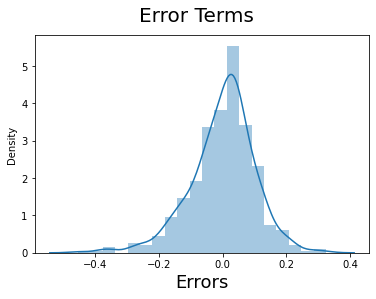

In [91]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Making Predictions

### Applying the scaling on the test sets

In [92]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

### Dividing into X_test and y_test

In [95]:
# Segregating into X and y 
X_test = bike_test.drop(["cnt"],axis=1)
y_test = bike_test["cnt"]

In [96]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [97]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

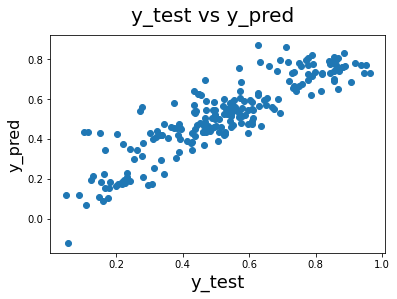

In [98]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

**Note:** It can be observed that the predicted output and actual output are in positive linear relationship

## R squared on Test Data

In [99]:
from sklearn.metrics import r2_score

In [100]:
r2_score(y_test, y_pred)

0.7802124353228018

**Note:** 
- R-squared on train data:                       0.793 (79.3%)
- R-squared on test data:                        0.7802 (78.02%)

**Correlation among selected variables and with target variable**

<AxesSubplot:>

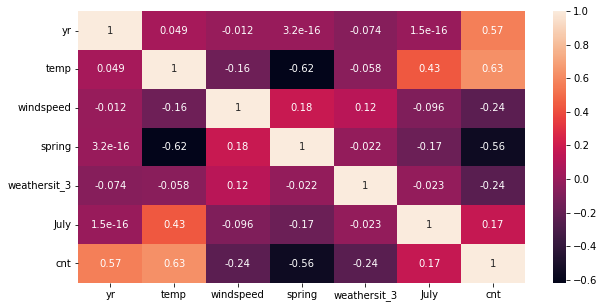

In [110]:
plt.figure(figsize=(10,5))
sns.heatmap(bike_data[['yr', 'temp', 'windspeed', 'spring', 'weathersit_3', 'July', 'cnt']].corr(),annot=True)

**OBSERVATION:** Year, temperature and spring seem to have more affect on cnt